In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import time
import matplotlib.pyplot as plt

In [2]:
table= [(0, 6, 99.87),(0, 9, 99.65),(0, 12, 99.25),(0, 24, 99.13),(0, 36, 98.17),(0, 60, 97.86),(0, 120, 96.12)]  
df1= pd.DataFrame(data= table, columns= ["Coupon", "Maturite", "Prix"])
                  
table_1= [(0, 12, 99.05),(0, 9, 98.45),(0, 12, 97.85),(0.035, 24, 101.4),(0.04, 36, 102.20)]

df= pd.DataFrame(data= table_1, columns= ["Coupon", "Maturite", "Prix"])
df1

,Coupon,Maturite,Prix
0,0,6,99.87
1,0,9,99.65
2,0,12,99.25
3,0,24,99.13
4,0,36,98.17
5,0,60,97.86
6,0,120,96.12


In [ ]:
# def taux(T, c, p= None, df_f=df,n=100, t=0):
#     """
    
#     """
#     ind= df_f[np.logical_and(df_f["Maturite"] == T, df_f["Prix"] == p)].index[0]
#     p= df_f["Prix"].iloc[ind]
#     C= c*100
#     Tn= T/12
#     if Tn - t <= 1 or c == 0:
#         return pow(n/p, 1/(Tn - t)) -1
#     else:
#         recu= C/pow(1+taux(T-12, c, p=df_f["Prix"].iloc[ind-1]), (Tn-1 - t))
#         return pow((C+n)/(p - recu),1/(Tn-t)) - 1
    

In [3]:
# ///////////////////////////
def taux(T, c, p= None, df_f=df,n=100, t=0):
    """
    
    """
    ind= df_f[np.logical_and(df_f["Maturite"] == T, df_f["Prix"] == p)].index[0]
    p= df_f["Prix"].iloc[ind]
    C= c*100
    Tn= T/12
    if Tn - t <= 1 or c == 0:
        return pow(n/p, 1/(Tn - t)) -1
    else:
        recu= C/pow(1+taux(df_f["Maturite"][ind-1], c, p=df_f["Prix"].iloc[ind-1], df_f=df_f), (Tn-1 - t))
        return pow((C+n)/(p - recu),1/(Tn-t)) - 1

In [12]:
listed= []
for i in df1.index:
    a= taux(df1["Maturite"][i]
              ,df1["Coupon"][i]
              ,df1["Prix"][i]
              ,df_f= df1)
    print(a)
    listed.append(a)
to= pd.Series(listed, name= 'Taux')
df1_final= pd.concat([df1, to], axis= 1)
df1_final

0.0026050788023028737
0.004685796609194659
0.007556675062972307
0.0043785911110687525
0.006175495658579555
0.004335832665508077
0.003965117873386159


,Coupon,Maturite,Prix,Taux
0,0,6,99.87,0.002605
1,0,9,99.65,0.004686
2,0,12,99.25,0.007557
3,0,24,99.13,0.004379
4,0,36,98.17,0.006175
5,0,60,97.86,0.004336
6,0,120,96.12,0.003965


In [10]:
for i in df.index:
    print(taux(df["Maturite"][i]
               ,df["Coupon"][i]
               ,df["Prix"][i]
              ))
    

0.009591115598182709
0.021046935109294562
0.02197240674501799
0.027807978739411654
0.01844695607687763


In [11]:
to= pd.Series(listed, name= 'Taux')
df1_final= pd.concat([df1, to], axis= 1)
df1_final

,Coupon,Maturite,Prix,Taux
0,0,6,99.87,0.009591
1,0,9,99.65,0.021047
2,0,12,99.25,0.021972
3,0,24,99.13,0.027808
4,0,36,98.17,0.018447
5,0,60,97.86,NaN
6,0,120,96.12,NaN


In [6]:
df2= pd.DataFrame({
    "Type": ["BTF", "BTF", "BTF", "FRTR", "FRTR", "FRTR", "FRTR"]
    , "Coupon": [0, 0, 0, 3.25, 0, 0, 0]
    , "Maturite": pd.to_datetime(["09/01/2020", "22/04/2020"
                                 ,"12/01/2020","25/10/2021"
                                 ,"25/02/2022","25/03/2024"
                                 ,"25/11/2029"], format= '%d/%m/%Y')
    , "Prix": [100.6160, 100.3620, 100.18, 108.2940, 101.7920, 102.9090, 102.4720]
})

t=  dt.date(day= 3, month= 10, year= 2019)
df2["Coupon"] = df2["Coupon"]/100

df2_mat= [val for val in df2["Maturite"]]

df2["Maturite"]=df2["Maturite"].apply(lambda x: (x.year - t.year)*12 + (x.month - t.month))
# df2= df2.sort_values("Maturite").reset_index(drop= True)


In [7]:
listed= []
for i in df2[df2["Type"] == "BTF"].index:
    print(taux(df2["Maturite"][i], df2["Coupon"][i], df2["Prix"][i],df_f= df2))
    listed.append(taux(df2["Maturite"][i], df2["Coupon"][i], df2["Prix"][i],df_f= df2))
for i in df2[df2["Type"] == "FRTR"].index:
    print(taux(df2["Maturite"][i], df2["Coupon"][i], df2["Prix"][i],df_f= df2))
    listed.append(taux(df2["Maturite"][i], df2["Coupon"][i], df2["Prix"][i],df_f= df2))

to= pd.Series(listed, name= 'Taux')
df_final= pd.concat([df2, to], axis= 1)

-0.02426516899466813
-0.0072008756967996135
-0.007167716273639546
-0.00846530937933565
-0.0075831005011467445
-0.006471403631553296
-0.002418829035174208


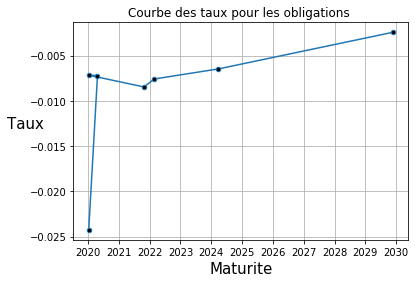

In [14]:
#graph
df_final["Maturite"]= df2_mat

def courbe_taux_print(df):
    fig, ax= plt.subplots()
    plt.grid(b= True)

    ax.plot(df["Maturite"]
            ,df["Taux"]
            , marker= '.'
            , markerfacecolor= 'black'
            , markersize= 9)

    ax.set_xlabel("Maturite", fontsize= 15)
    ax.set_ylabel("Taux", rotation= 0, fontsize= 15)
    ax.set_title("Courbe des taux pour les obligations ")

    plt.show()
    
courbe_taux_print(df_final)

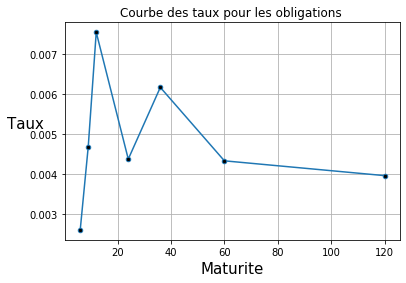

In [15]:
courbe_taux_print(df1_final)